# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [64]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import scipy.stats as st
import numpy as np


df = pd.read_csv('data/human_body_temperature.csv')

In [12]:
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1.Is the distribution of body temperature normal?

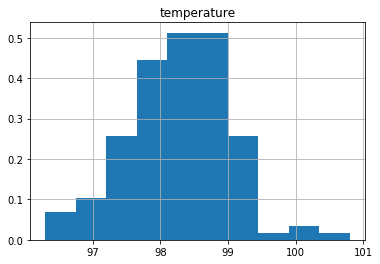

In [60]:

pd.DataFrame.hist(df, column='temperature', normed=True);


The Body Temperature is normally distributed, but it skewed to the right a little bit.

# 2.Is the sample size large? Are the observations independent?

In [16]:
#Get sample size and number of variables
df.shape

(130, 3)

In [66]:
df[df.temperature.isnull()]

,temperature,gender,heart_rate


the number of observation is 130 and number of variable is 3. The sample size is pretty large(130>30) and all observations are unique

# 3. Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  tt  or  zz  statistic?
- Now try using the other test. How is the result be different? Why?

In [17]:
df.describe()
#The mean temperature of sample is 98.25

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Make a hyphothesis test in order to check the sample mean is different from population mean or not.Since one set of data will be compared to a single value, one sample t-test will be appropriate to use for hyphothesis testing. 
- Ho: M = 98.6
- H1: M < 98.6


In [130]:
#Calculating t- statistics
t = st.ttest_1samp(sample, 98.6)[0]
p = st.ttest_1samp(sample, 98.6)[1]

print('The t-statistic is %.3f' %t)
print('The p-value is %.10f' %p)

The t-statistic is -4.682
The p-value is 0.0000071019


In [146]:
# Calculating z-statistics
mean=df.temperature.mean()
s=np.std(df.temperature)
n = len(df.temperature)

# Calculate standard error of the mean:
sem = s/np.sqrt(n)

z = (mean - 98.6) / sem

# Calculate p-value:
p = st.norm.cdf(z) * 2

# Print the values for z and p:
print('The z-statistic is %.3f' %z)
print('The p-value is %.10f' %p)


The z-statistic is -5.476
The p-value is 0.0000000435


In [82]:
P_value=st.norm.cdf(z) *2  # two sided
P_value

4.9021570141133797e-08

In [25]:
if P_value<0.05:
    print('Reject the null, Ho. True Population Mean =! 98.6 F')
else:
    print('Not reject the null, Ho.  True Population mean =98.6 F')

Reject the null, Ho. True Population Mean =! 98.6 F


# 4. Draw a small sample of size 10 from the data and repeat both tests.
- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [102]:
# Seed the random number generator:
np.random.seed(15)
# Draw a random sample of 10 from the temperature data:
sample = np.random.choice(df.temperature, size=10)
sample

array([ 98.4,  97.9,  97.1,  98.7,  98.2,  98.4,  98.2,  98.8,  96.7,  96.4])

In [113]:
# Calculate one sample t-test:
t = st.ttest_1samp(sample, 98.6)[0]
p = st.ttest_1samp(sample, 98.6)[1]

print('The t-statistic is %.3f' %t)
print('The p-value is %.3f' %p)

The t-statistic -2.688
The p-value is 0.025


In [120]:
# Calculate z-statistic:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p-value:
p = st.norm.cdf(z) * 2

# Print the values for z and p:
print('The z-statistic is %.3f' %z)
print('The p-value is %.4f' %p)

The z-statistic is -2.834
The p-value is 0.0046


As we reduced the sample size to 10, both t and z statistics gave higher p values compare to calculated t and z statistics before with sample size 130, so it reduced the power and made the analysis more robust. Again z statistics are very close to t-statistics. 

# 5.At what temperature should we consider someone's temperature to be "abnormal"?
- Start by computing the margin of error and confidence interval.

In [92]:
lower, upper = st.t.interval(0.95, len(df['temperature'])-1, 
                             loc=np.mean(df['temperature']), 
                             scale=st.sem(df['temperature']))

print( 'lower={:.2f}'.format(lower))
print('upper={:.2f}'.format(upper))

lower=98.12
upper=98.38


The confidance interval is between (98.12, 98.38) values, so any temperature can be abnormal, if it is higher than these values.

# 6.Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [95]:
#Set two data frame for both male and female
df_male= df[df.gender=='M']
df_female=df[df.gender=='F']
df_male_mean= df_male['temperature'].mean()
df_female_mean=df_female['temperature'].mean()
print('The mean value of temperature for male is df_male_mean={:.2f}'.format(df_male_mean))
print('The mean value of temperature for female is df_female_mean={:.2f}'.format(df_female_mean))

The mean value of temperature for male is df_male_mean=98.10
The mean value of temperature for female is df_female_mean=98.39


In [97]:
print(len(df_female), len(df_male))

(65, 65)


The sample size for both male and female is 65. As these two data set will be compare, two sample t-test will build a hypothesis test as; 
- Ho: Mo = M1
- H1: Mo ≠ M1

In [101]:
#Calculate two_sample t-test
two_sample = st.ttest_ind(df_male['temperature'], df_female['temperature'])
print('The t-statistic is %.3f and the p-value is %.3f.' % two_sample)

The t-statistic is -2.285 and the p-value is 0.024.


In [148]:
if P_value<0.05:
    print('Reject the null, Ho is not true. Thus, there is a significant difference between males and females in normal temperature.')
else:
    print('Fail to reject the null, Ho. is true. Thus, there is no significant difference between males and females in normal temperature.')

Reject the null, Ho is not true. Thus, there is a significant difference between males and females in normal temperature.
